### Why we use LSTM
1. RNNs have vanishing gradient problem
2. LSTM's solve this problem

[source: 'http://colah.github.io/posts/2015-08-Understanding-LSTMs/' ]

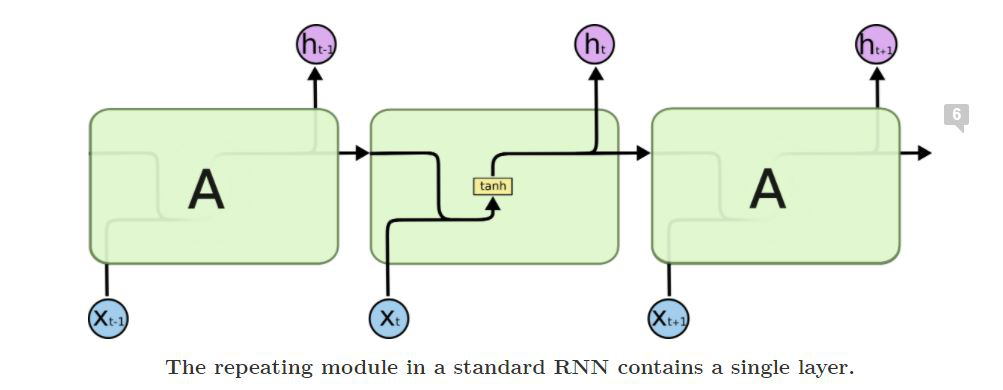

In [2]:
from PIL import Image
Image.open('./RNN cell.jpg') 

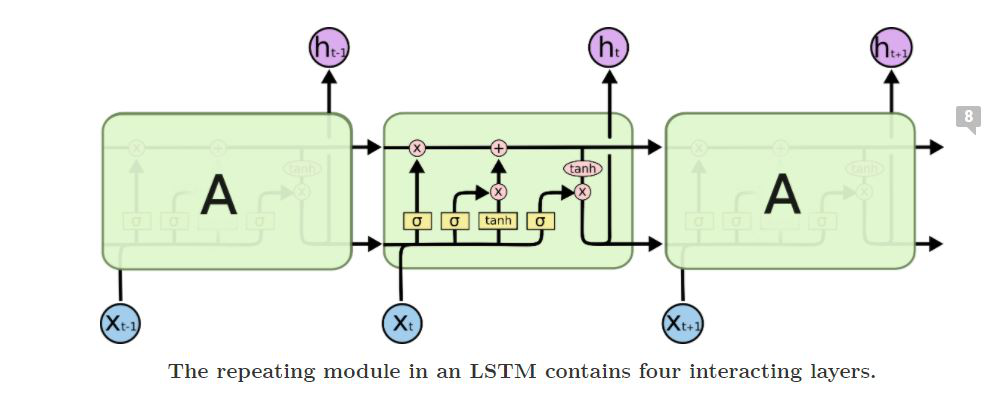

In [3]:
Image.open('./LSTM cell.jpg') 

In LSTM memory state passes freely through time and backwar through time( sometimes getting cancelled but not mostly). This makes it a good sequence model

#### Simple TensorFlow LSTM Example
[source: Jeff Heaton Deep Learning Course ]

In [83]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
import numpy as np

max_features = 4 # 0,1,2,3 (total of 4)
x = [
    [[0],[1],[1],[0],[0],[0]],
    [[0],[0],[0],[2],[2],[0]],
    [[0],[0],[0],[0],[3],[3]],
    [[0],[2],[2],[0],[0],[0]],
    [[0],[0],[3],[3],[0],[0]],
    [[0],[0],[0],[0],[1],[1]]
]
x = np.array(x,dtype=np.float32)
y = np.array([1,2,3,2,3,1],dtype=np.int32)

# Convert y2 to dummy variables
y2 = np.zeros((y.shape[0], max_features),dtype=np.float32)
y2[np.arange(y.shape[0]), y] = 1.0
print(y2)

print('Build model...')
model = Sequential()
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, \
               input_shape=(None, 1)))
model.add(Dense(4, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x,y2,epochs=200)
pred = model.predict(x)
predict_classes = np.argmax(pred,axis=1)
print("Predicted classes: {}",predict_classes)
print("Expected classes: {}",predict_classes)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
Build model...
Train...
Train on 6 samples
Epoch 1/200
6/6 [==============================] - 10s 2s/sample - loss: 1.3716 - accuracy: 0.1667
Epoch 2/200
6/6 [==============================] - 0s 3ms/sample - loss: 1.3616 - accuracy: 0.3333
Epoch 3/200
6/6 [==============================] - 0s 5ms/sample - loss: 1.3722 - accuracy: 0.1667
Epoch 4/200
6/6 [==============================] - 0s 3ms/sample - loss: 1.3444 - accuracy: 0.3333
Epoch 5/200
6/6 [==============================] - 0s 5ms/sample - loss: 1.3409 - accuracy: 0.5000
Epoch 6/200
6/6 [==============================] - 0s 3ms/sample - loss: 1.3304 - accuracy: 0.3333
Epoch 7/200
6/6 [==============================] - 0s 3ms/sample - loss: 1.3255 - accuracy: 0.5000
Epoch 8/200
6/6 [==============================] - 0s 3ms/sample - loss: 1.3109 - accuracy: 0.3333
Epoch 9/200
6/6 [==============================] - 0s 5ms/sample - loss: 1

Epoch 82/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.4306 - accuracy: 0.6667
Epoch 83/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.6750 - accuracy: 0.6667
Epoch 84/200
6/6 [==============================] - 0s 4ms/sample - loss: 0.5303 - accuracy: 0.8333
Epoch 85/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.3897 - accuracy: 0.8333
Epoch 86/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.9207 - accuracy: 0.6667
Epoch 87/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.7824 - accuracy: 0.6667
Epoch 88/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.4058 - accuracy: 0.8333
Epoch 89/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.5994 - accuracy: 0.8333
Epoch 90/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.4969 - accuracy: 0.8333
Epoch 91/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.6190 - accuracy: 0.6667


Epoch 164/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.4084 - accuracy: 0.8333
Epoch 165/200
6/6 [==============================] - 0s 4ms/sample - loss: 0.1983 - accuracy: 1.0000
Epoch 166/200
6/6 [==============================] - 0s 4ms/sample - loss: 0.6352 - accuracy: 0.6667
Epoch 167/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.5764 - accuracy: 0.6667
Epoch 168/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.1683 - accuracy: 1.0000
Epoch 169/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.1814 - accuracy: 1.0000
Epoch 170/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.4142 - accuracy: 0.8333
Epoch 171/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.3717 - accuracy: 0.8333
Epoch 172/200
6/6 [==============================] - 0s 3ms/sample - loss: 0.2518 - accuracy: 1.0000
Epoch 173/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.1622 - accurac

In [86]:
def runit(model, inp):
    inp = np.array(inp,dtype=np.float32)
    pred = model.predict(inp)
    return np.argmax(pred[0])

print( runit( model, [[[2],[2],[0],[0],[0],[0]]] ))


2


### Stock Prediction
[source: 'https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/' ]


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### For training our algorithm, we will be using the Apple stock prices from 1st January 2013 to 31 December 2017. For the sake of prediction, we will use the Apple stock prices for the month of January 2018.

In [88]:
apple_training_complete = pd.read_csv('./AAPL (1).csv')

In [89]:
apple_training_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,18.233213,19.121429,18.178572,19.006071,16.406870,659492400
1,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.926661,560518000
2,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.713015,352965200
3,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.247477,594333600
4,2013-01-07,18.642857,18.903572,18.400000,18.710714,16.151909,484156400
...,...,...,...,...,...,...,...
1255,2017-12-22,43.669998,43.855000,43.625000,43.752499,41.761749,65397600
1256,2017-12-26,42.700001,42.867500,42.419998,42.642502,40.702259,132742000
1257,2017-12-27,42.525002,42.695000,42.427502,42.650002,40.709415,85992800
1258,2017-12-28,42.750000,42.962502,42.619999,42.770000,40.823956,65920800


In [90]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values


In [91]:
apple_training_processed[0:5,:]

array([[18.233213],
       [19.779285],
       [19.567142],
       [19.1775  ],
       [18.642857]])

### Normalizing the data

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [93]:
apple_training_scaled

array([[0.14628787],
       [0.19795893],
       [0.19086893],
       ...,
       [0.95814044],
       [0.96566006],
       [0.96164959]])

#### Convert Training Data to Right Shape

we are going to predict the opening stock price of the data based on the opening stock prices for the past 60 days

#### create feature set and labels

In [94]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

features_set, labels = np.array(features_set), np.array(labels)


In [95]:
features_set

array([[0.14628787, 0.19795893, 0.19086893, ..., 0.09157317, 0.09246841,
        0.08174984],
       [0.19795893, 0.19086893, 0.17784675, ..., 0.09246841, 0.08174984,
        0.07382435],
       [0.19086893, 0.17784675, 0.15997852, ..., 0.08174984, 0.07382435,
        0.06437099],
       ...,
       [0.82579371, 0.82370491, 0.82053   , ..., 0.9921461 , 0.99640719,
        0.96398905],
       [0.82370491, 0.82053   , 0.82512526, ..., 0.99640719, 0.96398905,
        0.95814044],
       [0.82053   , 0.82512526, 0.83172595, ..., 0.96398905, 0.95814044,
        0.96566006]])

In [97]:
labels

array([0.07382435, 0.06437099, 0.04730245, ..., 0.95814044, 0.96566006,
       0.96164959])

In [98]:
features_set.shape

(1200, 60)

#### Since we are only using one feature, i.e Open, the number of indicators will be one. Execute the following script:

In [99]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))


In [100]:
features_set.shape

(1200, 60, 1)

In [101]:
labels[0]

0.07382434842934815

####  Define the LSTM Recurrent Neural Network. Here, you can add more LSTM layers and adjust the dropout in order to improve the accuracy of the model

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#### To add a layer to the sequential model, the add method is used. Inside the add method, we passed our LSTM layer. The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer. The second parameter is return_sequences, which is set to true since we will add more layers to the model. The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

#### Let's now add a dropout layer to our model. Dropout layer is added to avoid over-fitting, which is a phenomenon where a machine learning model performs better on the training data compared to the test data. Execute the following script to add dropout layer.

In [103]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))


In [104]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


#### fit on training data

In [105]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)


Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 15s 13ms/sample - loss: 0.0265
Epoch 2/100
1200/1200 [==============================] - 1s 555us/sample - loss: 0.0058
Epoch 3/100
1200/1200 [==============================] - 1s 574us/sample - loss: 0.0049
Epoch 4/100
1200/1200 [==============================] - 1s 614us/sample - loss: 0.0043
Epoch 5/100
1200/1200 [==============================] - 1s 557us/sample - loss: 0.0047
Epoch 6/100
1200/1200 [==============================] - 1s 625us/sample - loss: 0.0037
Epoch 7/100
1200/1200 [==============================] - 1s 575us/sample - loss: 0.0039
Epoch 8/100
1200/1200 [==============================] - 1s 610us/sample - loss: 0.0038
Epoch 9/100
1200/1200 [==============================] - 1s 600us/sample - loss: 0.0038
Epoch 10/100
1200/1200 [==============================] - 1s 611us/sample - loss: 0.0040
Epoch 11/100
1200/1200 [==============================] - 1s 568us/sample - loss: 0.0031
Epoch 12

1200/1200 [==============================] - 1s 547us/sample - loss: 0.0011
Epoch 93/100
1200/1200 [==============================] - 1s 562us/sample - loss: 0.0012
Epoch 94/100
1200/1200 [==============================] - 1s 552us/sample - loss: 0.0011
Epoch 95/100
1200/1200 [==============================] - 1s 546us/sample - loss: 0.0010
Epoch 96/100
1200/1200 [==============================] - 1s 555us/sample - loss: 0.0012
Epoch 97/100
1200/1200 [==============================] - 1s 553us/sample - loss: 0.0012
Epoch 98/100
1200/1200 [==============================] - 1s 565us/sample - loss: 0.0011
Epoch 99/100
1200/1200 [==============================] - 1s 549us/sample - loss: 0.0011
Epoch 100/100
1200/1200 [==============================] - 1s 565us/sample - loss: 0.0012


#### test Results

In [135]:
apple_testing_complete = pd.read_csv('./AAPL (2).csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [136]:
apple_testing_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.380238,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.373032,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.565216,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,42.038452,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.882305,82271200
5,2018-01-09,43.637501,43.764999,43.352501,43.582500,41.877506,86336000
6,2018-01-10,43.290001,43.575001,43.250000,43.572498,41.867889,95839600
7,2018-01-11,43.647499,43.872501,43.622501,43.820000,42.105709,74670800
8,2018-01-12,44.044998,44.340000,43.912498,44.272499,42.540501,101672400
9,2018-01-16,44.474998,44.847500,44.035000,44.047501,42.324310,118263600


In [137]:
len(apple_testing_processed)

20

#### Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set. Execute the following script to fetch those 80 values.

In [138]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)


In [139]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values


In [140]:
test_inputs

array([38.544998, 38.7425  , 38.952499, 39.014999, 38.9925  , 39.087502,
       39.182499, 39.474998, 39.945   , 40.105   , 39.1875  , 39.1525  ,
       39.2225  , 39.072498, 39.227501, 39.307499, 39.822498, 40.9725  ,
       41.974998, 42.467499, 41.650002, 43.5     , 43.092499, 43.477501,
       43.665001, 43.7775  , 43.7775  , 43.375   , 43.259998, 42.4925  ,
       42.794998, 42.759998, 42.572498, 42.695   , 43.34    , 43.775002,
       43.762501, 43.575001, 43.157501, 42.607498, 42.487499, 43.119999,
       42.264999, 41.875   , 42.2575  , 42.622501, 42.299999, 43.037498,
       43.125   , 43.099998, 43.407501, 43.720001, 43.7575  , 43.717499,
       43.5425  , 43.669998, 42.700001, 42.525002, 42.75    , 42.630001,
       42.540001, 43.1325  , 43.134998, 43.360001, 43.587502, 43.637501,
       43.290001, 43.647499, 44.044998, 44.474998, 44.037498, 44.842499,
       44.6525  , 44.325001, 44.325001, 44.3125  , 43.627499, 43.      ,
       42.540001, 41.3825  ])

In [141]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [142]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [143]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [144]:
test_features

array([[[0.82512526],
        [0.83172595],
        [0.8387443 ],
        ...,
        [0.95814044],
        [0.96566006],
        [0.96164959]],

       [[0.83172595],
        [0.8387443 ],
        [0.8408331 ],
        ...,
        [0.96566006],
        [0.96164959],
        [0.95864171]],

       [[0.8387443 ],
        [0.8408331 ],
        [0.84008117],
        ...,
        [0.96164959],
        [0.95864171],
        [0.97844354]],

       ...,

       [[0.90625448],
        [0.93975883],
        [0.95621864],
        ...,
        [1.01829796],
        [1.01788016],
        [0.99498684]],

       [[0.93975883],
        [0.95621864],
        [0.92889718],
        ...,
        [1.01788016],
        [0.99498684],
        [0.97401528]],

       [[0.95621864],
        [0.92889718],
        [0.99072571],
        ...,
        [0.99498684],
        [0.97401528],
        [0.95864171]]])

In [145]:
test_features[0].shape

(60, 1)

In [146]:
test_features.shape

(20, 60, 1)

In [147]:
predictions = model.predict(test_features)


In [148]:
predictions = scaler.inverse_transform(predictions)


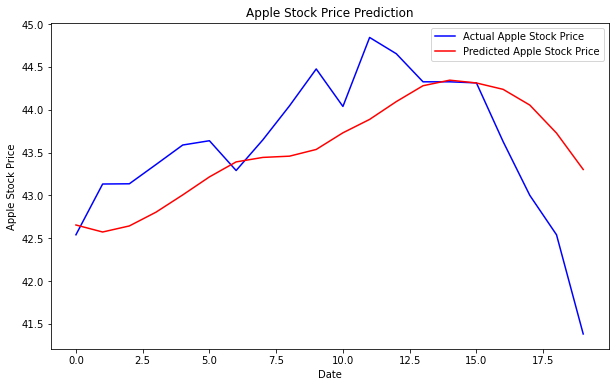

In [149]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()